<a href="https://colab.research.google.com/github/xVILENx/Dengue_SINAN/blob/main/dengue_graphics_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

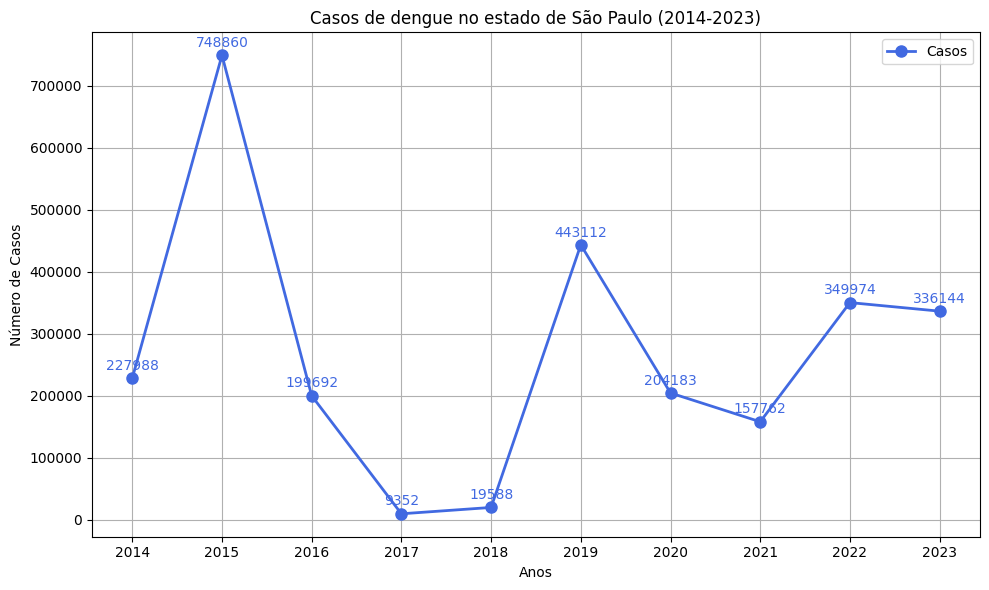

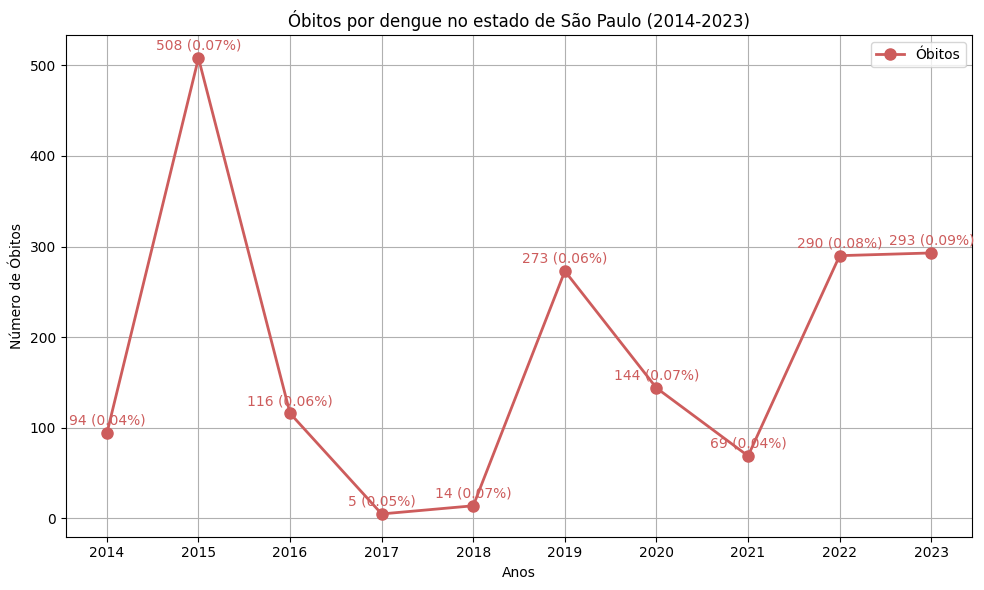

In [ ]:
# Importar as bibliotecas necess√°rias
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import auth
from googleapiclient.discovery import build
from google.auth.transport.requests import Request
from google.auth import default

# Autenticar e criar o servi√ßo da API Google Sheets
auth.authenticate_user()
creds, _ = default()
creds.refresh(Request())
service = build('sheets', 'v4', credentials=creds)

# Fun√ß√£o para ler dados da Google Sheets
def get_sheet_data(spreadsheet_id, range_name):
    sheet = service.spreadsheets()
    result = sheet.values().get(spreadsheetId=spreadsheet_id, range=range_name).execute()
    values = result.get('values', [])
    return values[0] if values else []

# ID da planilha do Google Sheets
spreadsheet_id = '1_9RDRSbd5Uo__vNQz5yKVoyumJtk7qTN_F3AVmLTEbs'

# Definir os ranges para "casos" e "obitos"
range_casos = 'casos!B19:K19'
range_obitos = 'obitos!B19:K19'

# Obter os dados
casos = list(map(int, get_sheet_data(spreadsheet_id, range_casos)))
obitos = list(map(int, get_sheet_data(spreadsheet_id, range_obitos)))

# Definir os anos
anos = list(range(2014, 2023 + 1))

# Plotar o gr√°fico de linhas para casos
plt.figure(figsize=(10, 6))
plt.plot(anos, casos, marker='o', color='royalblue', linestyle='-', linewidth=2, markersize=8, label='Casos')
plt.xlabel('Anos')
plt.ylabel('N√∫mero de Casos')
plt.title('Casos de dengue no estado de S√£o Paulo (2014-2023)')
plt.xticks(anos)

# Adicionar anota√ß√µes acima de cada ponto
for i, valor in enumerate(casos):
    plt.annotate(f'{valor}', (anos[i], casos[i]), textcoords="offset points", xytext=(0,6), ha='center', fontsize=10, color='royalblue')

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Calcular a taxa de letalidade
letalidade = [(o / c * 100) if c != 0 else 0 for o, c in zip(obitos, casos)]

# Plotar o gr√°fico de linhas para √≥bitos
plt.figure(figsize=(10, 6))
plt.plot(anos, obitos, marker='o', color='indianred', linestyle='-', linewidth=2, markersize=8, label='√ìbitos')
plt.xlabel('Anos')
plt.ylabel('N√∫mero de √ìbitos')
plt.title('√ìbitos por dengue no estado de S√£o Paulo (2014-2023)')
plt.xticks(anos)

# Adicionar anota√ß√µes acima de cada ponto
for i, (valor, let) in enumerate(zip(obitos, letalidade)):
    plt.annotate(f'{valor} ({let:.2f}%)', (anos[i], obitos[i]), textcoords="offset points", xytext=(0,6), ha='center', fontsize=10, color='indianred')

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

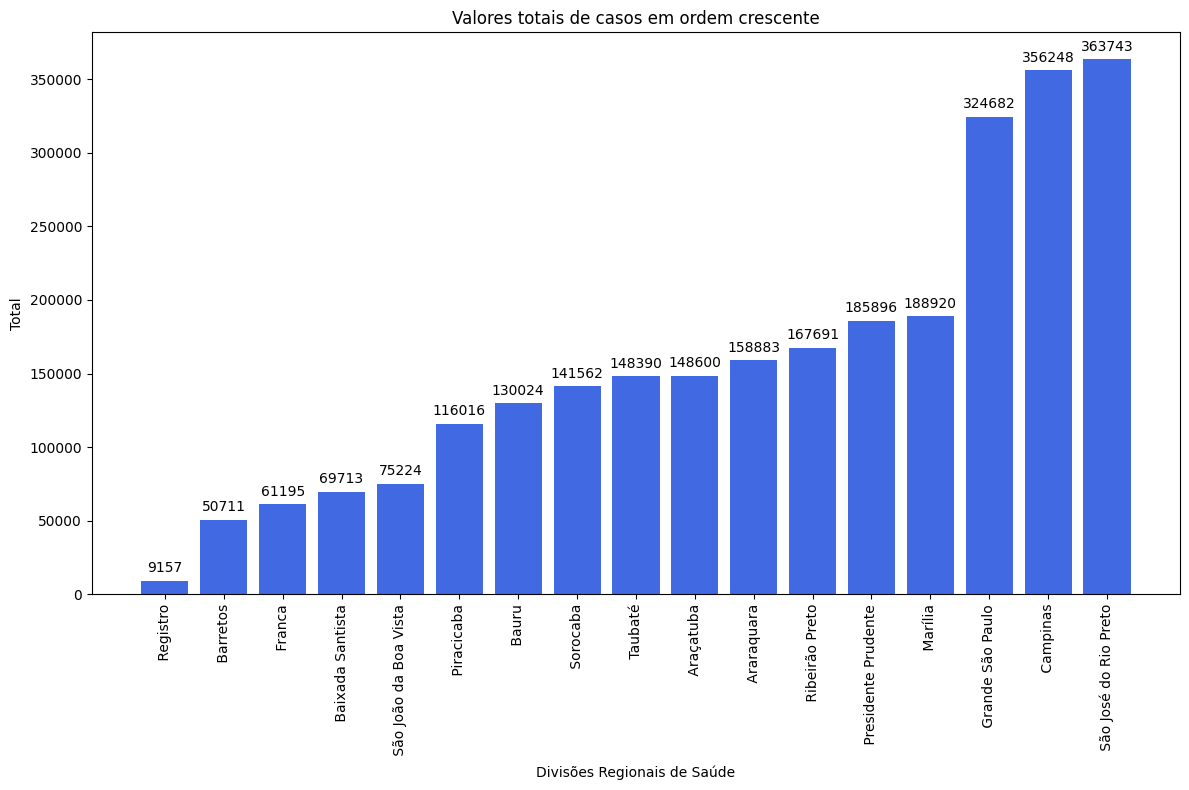

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Fun√ß√£o para remover n√∫meros de uma string
def remover_numeros(texto):
    return re.sub(r'\d+', '', texto)

# Ler o arquivo CSV
dados = pd.read_csv('/content/Dengue_SINAN - casos.csv')

# Remover n√∫meros da coluna "Div.adm.estadual de notific"
dados['Div.adm.estadual de notific'] = dados['Div.adm.estadual de notific'].apply(remover_numeros)

# Ordenar os valores da coluna "Total" em ordem crescente
dados = dados.sort_values(by='Total')

# Descartar o maior valor
dados = dados.iloc[:-1]

# Plotar gr√°fico de barras
plt.figure(figsize=(12, 8))
bars = plt.bar(dados['Div.adm.estadual de notific'], dados['Total'], color='royalblue')

# Tamanho da fonte dos valores
tamanho_fonte = 10  # Ajuste o tamanho da fonte aqui

# Adicionar valores no topo das barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + (max(dados['Total']) * 0.01),
             str(height), ha='center', va='bottom', fontsize=tamanho_fonte)

# Adicionar t√≠tulo e r√≥tulos dos eixos
plt.title('Valores totais de casos em ordem crescente')
plt.xlabel('Divis√µes Regionais de Sa√∫de')
plt.ylabel('Total')
plt.xticks(rotation=90)

# Remover a grade
plt.grid(False)

plt.tight_layout()
plt.show()


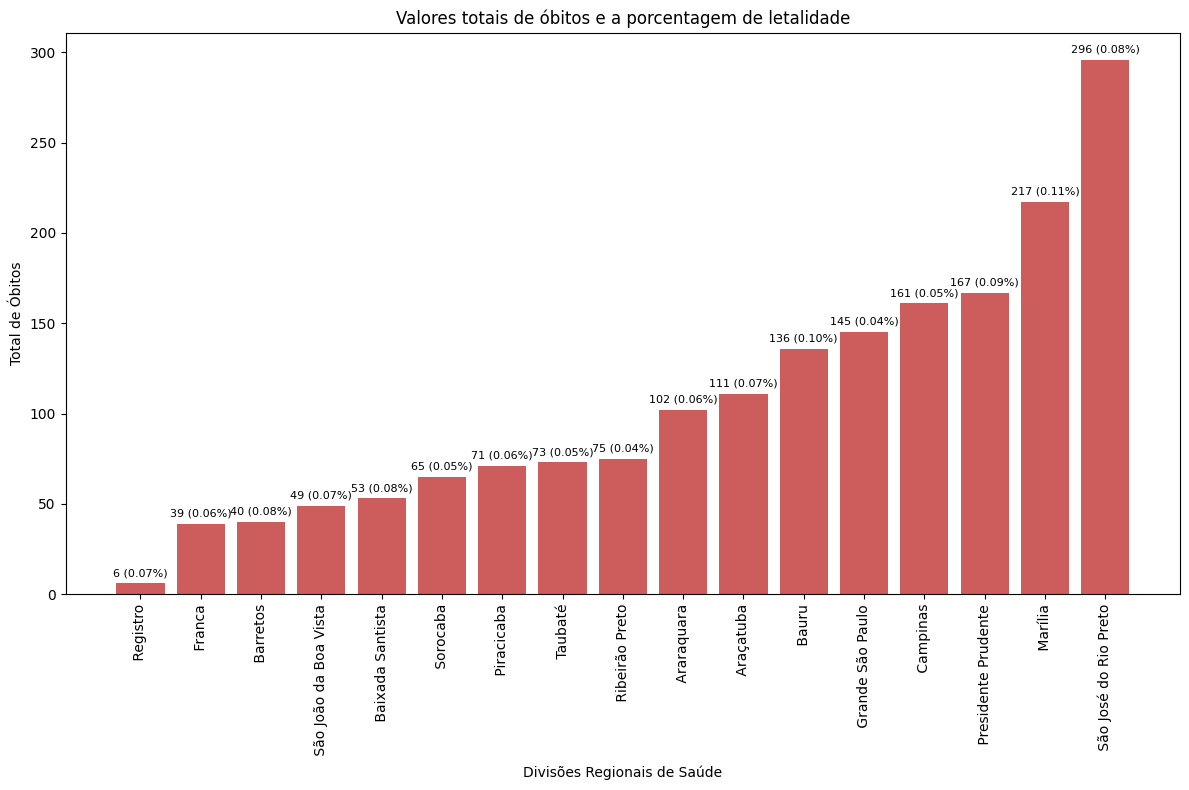

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Fun√ß√£o para remover n√∫meros de uma string
def remover_numeros(texto):
    return re.sub(r'\d+', '', texto)

# Ler os arquivos CSV
dados_obitos = pd.read_csv('/content/Dengue_SINAN - obitos.csv')
dados_casos = pd.read_csv('/content/Dengue_SINAN - casos.csv')

# Remover n√∫meros da coluna "Div.adm.estadual de notific"
dados_obitos['Div.adm.estadual de notific'] = dados_obitos['Div.adm.estadual de notific'].apply(remover_numeros)
dados_casos['Div.adm.estadual de notific'] = dados_casos['Div.adm.estadual de notific'].apply(remover_numeros)

# Combinar os DataFrames com base na coluna 'Div.adm.estadual de notific'
dados = pd.merge(dados_obitos[['Div.adm.estadual de notific', 'Total']],
                 dados_casos[['Div.adm.estadual de notific', 'Total']],
                 on='Div.adm.estadual de notific',
                 suffixes=('_obitos', '_casos'))

# Calcular a letalidade (√≥bitos / casos) * 100 para obter a porcentagem
dados['Letalidade (%)'] = (dados['Total_obitos'] / dados['Total_casos']) * 100

# Ordenar os valores da coluna "Total_obitos" em ordem crescente
dados = dados.sort_values(by='Total_obitos')

# Descartar o maior valor de √≥bitos (se necess√°rio)
dados = dados.iloc[:-1]

# Plotar gr√°fico de barras
plt.figure(figsize=(12, 8))
bars = plt.bar(dados['Div.adm.estadual de notific'], dados['Total_obitos'], color='indianred')

# Tamanho da fonte dos valores
tamanho_fonte = 8  # Ajuste o tamanho da fonte aqui

# Adicionar valores e porcentagens de letalidade no topo das barras
for i, (bar, letalidade) in enumerate(zip(bars, dados['Letalidade (%)'])):
    height = bar.get_height()
    texto_exibido = f"{height} ({letalidade:.2f}%)"
    plt.text(bar.get_x() + bar.get_width() / 2, height + (max(dados['Total_obitos']) * 0.01),
             texto_exibido, ha='center', va='bottom', fontsize=tamanho_fonte)

# Adicionar t√≠tulo e r√≥tulos dos eixos
plt.title('Valores totais de √≥bitos e a porcentagem de letalidade')
plt.xlabel('Divis√µes Regionais de Sa√∫de')
plt.ylabel('Total de √ìbitos')
plt.xticks(rotation=90)

# Remover a grade
plt.grid(False)

plt.tight_layout()
plt.show()


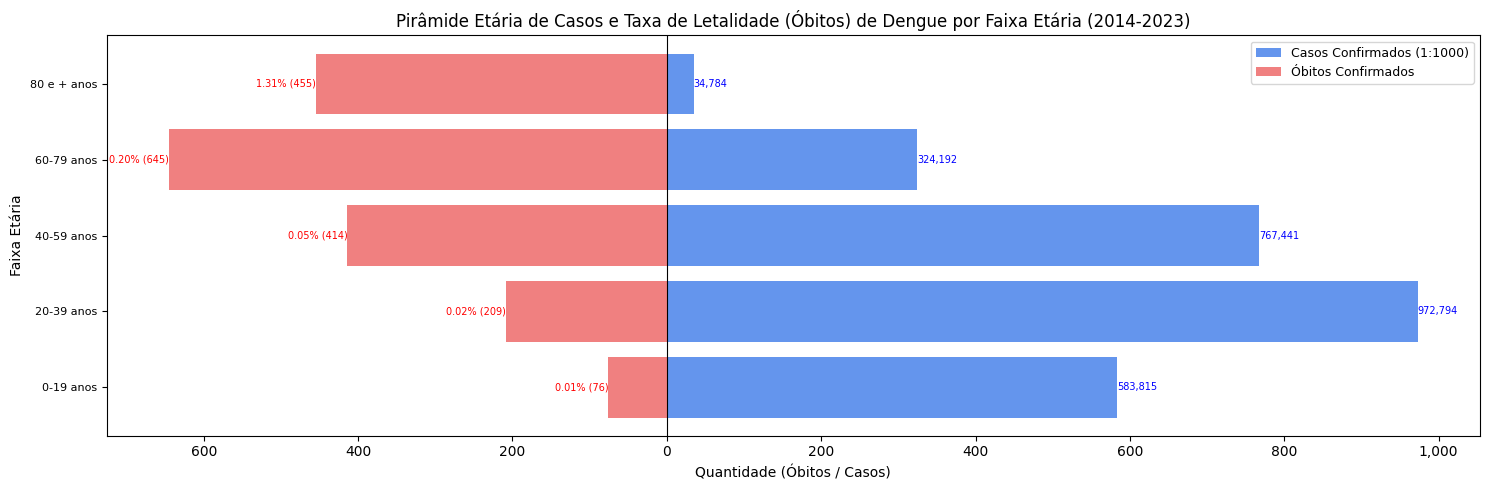

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import gspread
from google.colab import auth
from google.auth import default
import numpy as np

# Autenticar no Google
auth.authenticate_user()
creds, _ = default()

# Autorizar o acesso √† planilha com as credenciais obtidas
gc = gspread.authorize(creds)

# Substitua com o ID da sua planilha do Google Sheets
spreadsheet_id = '1_9RDRSbd5Uo__vNQz5yKVoyumJtk7qTN_F3AVmLTEbs'

# Abrir a planilha usando o ID
spreadsheet = gc.open_by_key(spreadsheet_id)

# Ler a p√°gina "casos_simples"
worksheet_casos = spreadsheet.worksheet('casos_simples')

# Extrair dados de faixa et√°ria e casos confirmados
faixa_etaria = worksheet_casos.row_values(1)[1:6]  # B1 at√© F1
faixa_etaria = [f'{faixa} anos' for faixa in faixa_etaria]  # Adicionar "anos" ap√≥s cada faixa et√°ria
casos_confirmados = worksheet_casos.row_values(12)[1:6]  # B12 at√© F12
casos_confirmados = list(map(int, casos_confirmados))  # Converter para inteiros

# Ler a p√°gina "obitos_simples"
worksheet_obitos = spreadsheet.worksheet('obitos_simples')

# Extrair dados de √≥bitos confirmados
obitos_confirmados = worksheet_obitos.row_values(12)[1:6]  # B12 at√© F12
obitos_confirmados = list(map(int, obitos_confirmados))  # Converter para inteiros

# Dividir os valores de casos por 1000
casos_confirmados_div1000 = [casos / 1000 for casos in casos_confirmados]

# Configura√ß√£o da figura com tamanho ajust√°vel
plt.figure(figsize=(15, 5))  # Tamanho ajustado para o gr√°fico

# Plotar os casos confirmados (lado direito)
bars_casos = plt.barh(faixa_etaria, casos_confirmados_div1000, color='cornflowerblue', label='Casos Confirmados (1:1000)')

# Plotar os √≥bitos confirmados (lado esquerdo, valores negativos para visualiza√ß√£o correta)
bars_obitos = plt.barh(faixa_etaria, [-obitos for obitos in obitos_confirmados], color='lightcoral', label='√ìbitos Confirmados')

# Adicionar r√≥tulos de taxa de letalidade e valores nas barras
fontsize_values = 7  # Tamanho da fonte para os valores
for bar_casos, bar_obitos, casos, obitos in zip(bars_casos, bars_obitos, casos_confirmados, obitos_confirmados):
    taxa_letalidade = (obitos * 100 / casos) if casos > 0 else 0
    plt.text(bar_casos.get_width() + 0.05, bar_casos.get_y() + bar_casos.get_height() / 2, f'{casos:,}', ha='left', va='center', color='blue', fontsize=fontsize_values)
    plt.text(bar_obitos.get_width() - 0.05, bar_obitos.get_y() + bar_obitos.get_height() / 2, f'{taxa_letalidade:.2f}% ({obitos})', ha='right', va='center', color='red', fontsize=fontsize_values)

# Configura√ß√µes do gr√°fico
plt.xlabel('Quantidade (√ìbitos / Casos)')
plt.ylabel('Faixa Et√°ria')
plt.title('Pir√¢mide Et√°ria de Casos e Taxa de Letalidade (√ìbitos) de Dengue por Faixa Et√°ria (2014-2023)')
plt.axvline(0, color='black', linewidth=0.8)  # Linha central

# Adicionar legenda
plt.legend(loc='upper right', fontsize=9)  # Ajuste do tamanho da fonte da legenda

# Ajustar o tamanho da fonte dos ticks do eixo y
plt.yticks(fontsize=8)

# Configurar a formata√ß√£o dos n√∫meros na linha "quantidade" para evitar negativos
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{abs(int(x)):,}'))

# Ajustar layout para que tudo fique vis√≠vel e evitar sobreposi√ß√£o
plt.tight_layout()
plt.show()


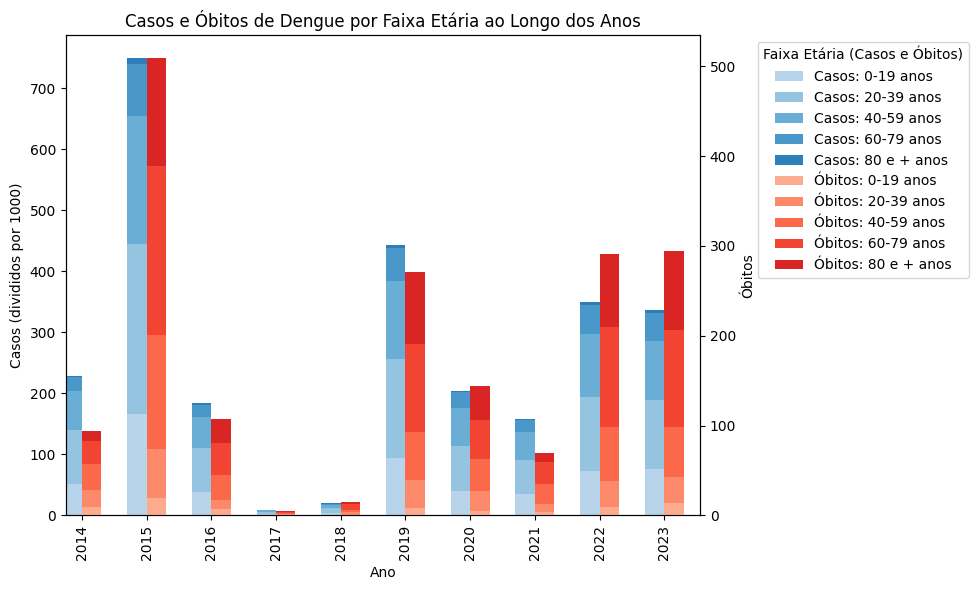

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import gspread
from google.colab import auth
from google.auth import default

# Autenticar no Google
auth.authenticate_user()
creds, _ = default()

# Autorizar o acesso √† planilha com as credenciais obtidas
gc = gspread.authorize(creds)

# Substitua com o ID da sua planilha do Google Sheets
spreadsheet_id = '1_9RDRSbd5Uo__vNQz5yKVoyumJtk7qTN_F3AVmLTEbs'

# Abrir a planilha usando o ID
spreadsheet = gc.open_by_key(spreadsheet_id)

# Ler a p√°gina "casos_simples"
worksheet_casos = spreadsheet.worksheet('casos_simples')

# Extrair dados
faixa_etaria = worksheet_casos.row_values(1)[1:6]  # B1 at√© F1 (5 faixas et√°rias)
faixa_etaria = [f'{faixa} anos' for faixa in faixa_etaria]  # Adicionar "anos" ap√≥s cada faixa et√°ria
anos_casos = worksheet_casos.col_values(1)[1:11]  # A2 at√© A11 (10 anos)
casos_por_faixa_etaria = worksheet_casos.get_values('B2:F11')  # Dados de B2:F11

# Converter os dados para inteiros
casos_por_faixa_etaria = [[int(caso) if caso else 0 for caso in linha] for linha in casos_por_faixa_etaria]

# Criar DataFrame com o n√∫mero de faixas et√°rias e anos corretos
df_casos = pd.DataFrame(casos_por_faixa_etaria, columns=faixa_etaria, index=anos_casos)

# Dividir os valores de casos por 1000
df_casos_dividido = df_casos / 1000

# Ler a p√°gina "obitos_simples"
worksheet_obitos = spreadsheet.worksheet('obitos_simples')

# Extrair dados
faixa_etaria_obitos = worksheet_obitos.row_values(1)[1:6]  # B1 at√© F1 (5 faixas et√°rias)
faixa_etaria_obitos = [f'{faixa} anos' for faixa in faixa_etaria_obitos]  # Adicionar "anos" ap√≥s cada faixa et√°ria
anos_obitos = worksheet_obitos.col_values(1)[1:11]  # A2 at√© A11 (10 anos)
obitos_por_faixa_etaria = worksheet_obitos.get_values('B2:F11')  # Dados de B2:F11

# Converter os dados para inteiros
obitos_por_faixa_etaria = [[int(obito) if obito else 0 for obito in linha] for linha in obitos_por_faixa_etaria]

# Criar DataFrame com o n√∫mero de faixas et√°rias e anos corretos
df_obitos = pd.DataFrame(obitos_por_faixa_etaria, columns=faixa_etaria_obitos, index=anos_obitos)

# Criar a figura e o eixo principal
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotar as colunas empilhadas para casos no eixo esquerdo
df_casos_dividido.plot(kind='bar', stacked=True, color=plt.cm.Blues(np.linspace(0.3, 0.7, len(df_casos_dividido.columns))),
                       edgecolor='none', position=1, width=0.3, ax=ax1, legend=False)
ax1.set_ylabel('Casos (divididos por 1000)')
ax1.grid(False)  # Remover a grade

# Plotar as colunas empilhadas para √≥bitos no eixo direito
ax2 = ax1.twinx()  # Criar um segundo eixo y compartilhando o mesmo eixo x
df_obitos.plot(kind='bar', stacked=True, color=plt.cm.Reds(np.linspace(0.3, 0.7, len(df_obitos.columns))),
               edgecolor='none', position=0, width=0.3, ax=ax2, legend=False)
ax2.set_ylabel('√ìbitos')
ax2.grid(False)  # Remover a grade

# Adicionar t√≠tulo e r√≥tulos
ax1.set_xlabel('Ano')
ax1.set_title('Casos e √ìbitos de Dengue por Faixa Et√°ria ao Longo dos Anos')

# Criar uma legenda combinada fora do gr√°fico, com Casos primeiro
handles_casos, _ = ax1.get_legend_handles_labels()
handles_obitos, _ = ax2.get_legend_handles_labels()

# Unir as legendas de casos e √≥bitos em uma √∫nica legenda, com Casos primeiro
handles = handles_casos + handles_obitos
labels = [f'Casos: {label}' for label in faixa_etaria] + [f'√ìbitos: {label}' for label in faixa_etaria_obitos]

# Adicionar a legenda unificada fora do gr√°fico
plt.legend(handles, labels, title='Faixa Et√°ria (Casos e √ìbitos)', loc='upper left', bbox_to_anchor=(1.08, 1))

# Ajustar o layout e exibir o gr√°fico
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import folium
import branca

# Fun√ß√£o para normalizar os valores (escala de 0 a 1)
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

# Carregar os dados dos CSVs
df_casos = pd.read_csv('/content/Dengue_SINAN - casos.csv')
df_obitos = pd.read_csv('/content/Dengue_SINAN - obitos.csv')

# Remover a linha 'Total' (assumindo que a linha 19 tenha √≠ndice 18)
df_casos = df_casos.drop(index=17)
df_obitos = df_obitos.drop(index=17)

# Remover os n√∫meros antes dos nomes das divis√µes administrativas
df_casos['Div.adm.estadual de notific'] = df_casos['Div.adm.estadual de notific'].apply(lambda x: x.split(' ', 1)[1])
df_obitos['Div.adm.estadual de notific'] = df_obitos['Div.adm.estadual de notific'].apply(lambda x: x.split(' ', 1)[1])

# Mapear as divis√µes administrativas para suas coordenadas (latitude e longitude)
coordenadas = {
    'Grande S√£o Paulo': [-23.5505, -46.6333],
    'Ara√ßatuba': [-21.2076, -50.4372],
    'Araraquara': [-21.7944, -48.1756],
    'Baixada Santista': [-23.9675, -46.3297],
    'Barretos': [-20.5531, -48.5698],
    'Bauru': [-22.3145, -49.0582],
    'Campinas': [-22.9053, -47.0659],
    'Franca': [-20.5386, -47.4009],
    'Mar√≠lia': [-22.2171, -49.9501],
    'Piracicaba': [-22.7338, -47.6476],
    'Presidente Prudente': [-22.1207, -51.3939],
    'Registro': [-24.4878, -47.8434],
    'Ribeir√£o Preto': [-21.1775, -47.8103],
    'S√£o Jo√£o da Boa Vista': [-21.9697, -46.7987],
    'S√£o Jos√© do Rio Preto': [-20.8202, -49.3797],
    'Sorocaba': [-23.5015, -47.4526],
    'Taubat√©': [-23.0264, -45.5551]
}

# Adicionar colunas de latitude e longitude aos dataframes
df_casos['Latitude'] = df_casos['Div.adm.estadual de notific'].map(lambda x: coordenadas[x][0])
df_casos['Longitude'] = df_casos['Div.adm.estadual de notific'].map(lambda x: coordenadas[x][1])
df_obitos['Latitude'] = df_obitos['Div.adm.estadual de notific'].map(lambda x: coordenadas[x][0])
df_obitos['Longitude'] = df_obitos['Div.adm.estadual de notific'].map(lambda x: coordenadas[x][1])

# Normalizar os dados para escala de cor
df_casos['Total_normalized'] = normalize(df_casos['Total'])
df_obitos['Total_normalized'] = normalize(df_obitos['Total'])

# Criar um mapa centrado em S√£o Paulo
mapa = folium.Map(location=[-23.5505, -46.6333], zoom_start=7)

# Definir colormaps para casos e √≥bitos (azul para casos e vermelho para √≥bitos)
colormap_casos = branca.colormap.LinearColormap(colors=['lightblue', 'darkblue'], vmin=0, vmax=1)
colormap_obitos = branca.colormap.LinearColormap(colors=['lightcoral', 'darkred'], vmin=0, vmax=1)

# Adicionar c√≠rculos ao mapa para "casos"
for _, row in df_casos.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=row['Total_normalized'] * 50,  # Tamanho dos c√≠rculos ajustado pela magnitude
        color=colormap_casos(row['Total_normalized']),
        fill=True,
        fill_opacity=0.6,
        popup=f"{row['Div.adm.estadual de notific']}: {row['Total']} casos"
    ).add_to(mapa)

# Adicionar c√≠rculos ao mapa para "√≥bitos"
for _, row in df_obitos.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=row['Total_normalized'] * 30,  # Tamanho dos c√≠rculos ajustado pela magnitude
        color=colormap_obitos(row['Total_normalized']),
        fill=True,
        fill_opacity=0.6,
        popup=f"{row['Div.adm.estadual de notific']}: {row['Total']} √≥bitos"
    ).add_to(mapa)

# Substituir a legenda anterior por uma nova legenda automatizada com colormap
legend_html = f'''
<div style="position: fixed;
     bottom: 50px; left: 50px; width: 500px; height: 240px;
     background-color: white; z-index:9999; font-size:14px;
     border:2px solid grey; padding: 10px;">
     <b>Legenda:</b><br>
     Casos [azul claro (ü†ó casos) - azul escuro (ü†ï casos)]:<br>
     Escala: 0 a 1<br>
    <div style="padding-top: 5px;">{colormap_casos._repr_html_()}</div>
        <br>
     √ìbitos [vermelho claro (ü†ó √≥bitos) - vermelho escuro (ü†ï √≥bitos)]:<br>
     Escala: 0 a 1<br>
     <div style="padding-top: 5px;">{colormap_obitos._repr_html_()}</div>
     </div>
</div>
'''

mapa.get_root().html.add_child(folium.Element(legend_html))

# Salvar o mapa em um arquivo HTML
mapa.save("mapa_calor_casos_obitos.html")

